# 如何使用Matplotlib来查看配体以及蛋白结构

## 前言

我们已经有了很多的分子可视化工具。

例如：PyMol，Chimera，JS3dmol，jmol，NGL等等。

但是在使用的过程中，我们是否真正的知晓我们所看到的是什么。

stick，surface，hydrogen bonding究竟其准确的定义以及在3D上的呈现是什么样子。

正如下方的图，你可以熟练使用PyMol以及其他作图工具做出这样吸引人眼球的figure，但是你知晓其中的物理化学以及结构含义吗。
｜
我本身没有3D可视化的编程技巧，PyMol的熟练使用者，JS3dmol的拥护者，NGL的转型者而已。

但是，在这里我希望使用最简单的作图工具Matplotlib来演示一下我们所习以为常的结构，SBDD，LBDD，AIDD等等。

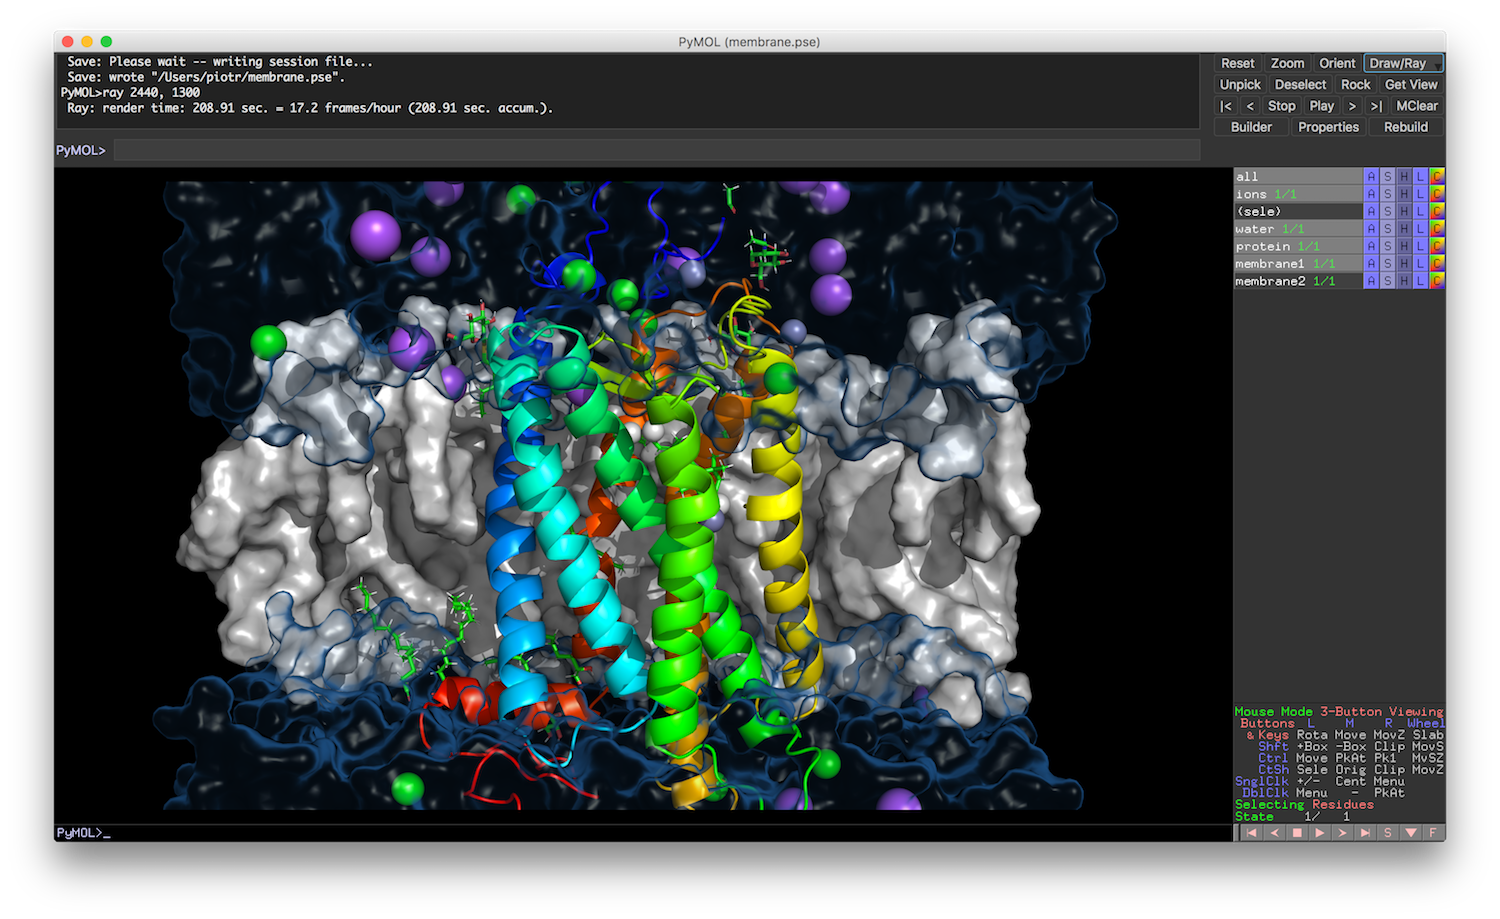

## 步骤

In [11]:
# 安装matplotlib
# 官网：https://matplotlib.org/
# 假如你不熟悉matplotlib可以从其官方网站中进行简短的学习：https://matplotlib.org/stable/gallery/index.html
!conda install matplotlib -y

Solving environment: done

# All requested packages already installed.



In [5]:
# 安装rdkit
# rdkit是一个十分好用的化学信息学包，你可以用它来进行结构的转化，修改，以及某些化学属性的计算
!conda install -c rdkit rdkit -y

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::ipywidgets==7.6.3=pyhd3deb0d_0
  - conda-forge/noarch::jupyter_console==6.4.0=pyhd8ed1ab_0
  - conda-forge/noarch::qtconsole==5.1.0=pyhd8ed1ab_0
  - conda-forge/noarch::notebook==6.4.0=pyha770c72_0
  - conda-forge/noarch::jupyterlab==3.0.14=pyhd8ed1ab_0
  - conda-forge/osx-64::jupyter==1.0.0=py37hf985489_6
  - conda-forge/osx-64::ipykernel==5.5.5=py37h85f7c60_0
  - conda-forge/noarch::nbclassic==0.3.1=pyhd8ed1ab_1
  - conda-forge/osx-64::ipython==7.24.1=py37h85f7c60_0
  - conda-forge/osx-64::widgetsnbextension==3.5.1=py37hf985489_4
done

## Package Plan ##

  environment location: /Users/sujiaqi/miniconda3/envs/pro_design

  added / updated specs:
    - rdkit


The following NEW packages will be INSTALLED:

  decorator          conda-forge/noarch::decorator-5.0.9-pyhd8ed1ab_0


Preparing transaction: done
Verifyi

 现在我们来看一个普通的化学结构，Phe-苯丙氨酸
 
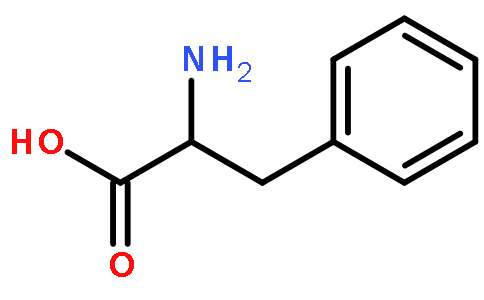

其SMILES文本为`C1=CC=C(C=C1)C[C@@H](C(=O)O)N`

其3D mol2格式文本为
```
# created with PyMOL 2.5.0
@<TRIPOS>MOLECULE
obj01
11 11 1                 
SMALL
USER_CHARGES
@<TRIPOS>ATOM
1	   N	1.378	-1.795	-1.043	N.3	1	PHE2	-0.416	
2	  CA	1.893	-0.429	-1.043	C.3	1	PHE2	-0.002	
3	   C	3.403	-0.419	-1.043	C.2	1	PHE2	0.597	
4	   O	4.078	-1.486	-1.043	O.2	1	PHE2	-0.568	
5	  CB	1.385	0.334	0.218	C.3	1	PHE2	-0.034	
6	  CG	-0.139	0.429	0.393	C.2	1	PHE2	0.012	
7	 CD1	-0.821	-0.586	1.074	C.2	1	PHE2	-0.126	
8	 CD2	-0.860	1.483	-0.173	C.2	1	PHE2	-0.126	
9	 CE1	-2.208	-0.556	1.171	C.2	1	PHE2	-0.170	
10	 CE2	-2.248	1.518	-0.066	C.2	1	PHE2	-0.170	
11	  CZ	-2.921	0.497	0.603	C.2	1	PHE2	-0.107	
@<TRIPOS>BOND
1 1 2 1
2 2 3 1
3 2 5 1
4 3 4 2
5 5 6 1
6 6 7 2
7 6 8 1
8 8 10 2
9 7 9 1
10 10 11 1
11 9 11 2
@<TRIPOS>SUBSTRUCTURE
1	PHE2	1	RESIDUE	1 ****	PHE
```


In [2]:
# 使用rdkit读入mol2 文本
import rdkit
from rdkit import Chem

RDKit WARNING: [21:22:08] Enabling RDKit 2019.09.3 jupyter extensions


In [3]:
phe_txt='''
# created with PyMOL 2.5.0
@<TRIPOS>MOLECULE
obj01
11 11 1                 
SMALL
USER_CHARGES
@<TRIPOS>ATOM
1       N    1.378    -1.795    -1.043    N.3    1    PHE2    -0.416    
2      CA    1.893    -0.429    -1.043    C.3    1    PHE2    -0.002    
3       C    3.403    -0.419    -1.043    C.2    1    PHE2    0.597    
4       O    4.078    -1.486    -1.043    O.2    1    PHE2    -0.568    
5      CB    1.385    0.334    0.218    C.3    1    PHE2    -0.034    
6      CG    -0.139    0.429    0.393    C.2    1    PHE2    0.012    
7     CD1    -0.821    -0.586    1.074    C.2    1    PHE2    -0.126    
8     CD2    -0.860    1.483    -0.173    C.2    1    PHE2    -0.126    
9     CE1    -2.208    -0.556    1.171    C.2    1    PHE2    -0.170    
10     CE2    -2.248    1.518    -0.066    C.2    1    PHE2    -0.170    
11      CZ    -2.921    0.497    0.603    C.2    1    PHE2    -0.107    
@<TRIPOS>BOND
1 1 2 1
2 2 3 1
3 2 5 1
4 3 4 2
5 5 6 1
6 6 7 2
7 6 8 1
8 8 10 2
9 7 9 1
10 10 11 1
11 9 11 2
@<TRIPOS>SUBSTRUCTURE
1    PHE2    1    RESIDUE    1 ****    PHE
'''

In [4]:
phe_mol=Chem.MolFromMol2Block(phe_txt)

RDKit WARNING: [21:22:09] obj01: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.


In [5]:
# 我们来直接查看phe_mol中的原子以及价键连接


In [6]:
# 原子数目
print('原子数目:',phe_mol.GetNumAtoms())
# 价键数目
print('价键鼠目:',phe_mol.GetNumBonds())

原子数目: 11
价键鼠目: 11


In [7]:
# 显示原子类型以及价键连接类型
print('Atom Index\tSymbol')
for atom in phe_mol.GetAtoms():
    print([atom.GetIdx(),atom.GetSymbol()])

Atom Index	Symbol
[0, 'N']
[1, 'C']
[2, 'C']
[3, 'O']
[4, 'C']
[5, 'C']
[6, 'C']
[7, 'C']
[8, 'C']
[9, 'C']
[10, 'C']


In [35]:
 #显示价键连接类型
print('Bond Index\tBondtype\tBeginAtomIdx\tGetEndAtomIdx')
for bond in phe_mol.GetBonds():
    bond_infor = [bond.GetIdx(),bond.GetBondType(),bond.GetBeginAtomIdx(),bond.GetEndAtomIdx()]
    print(bond_infor)

Bond Index	Bondtype	BeginAtomIdx	GetEndAtomIdx
[0, rdkit.Chem.rdchem.BondType.SINGLE, 0, 1]
[1, rdkit.Chem.rdchem.BondType.SINGLE, 1, 2]
[2, rdkit.Chem.rdchem.BondType.SINGLE, 1, 4]
[3, rdkit.Chem.rdchem.BondType.DOUBLE, 2, 3]
[4, rdkit.Chem.rdchem.BondType.SINGLE, 4, 5]
[5, rdkit.Chem.rdchem.BondType.AROMATIC, 5, 6]
[6, rdkit.Chem.rdchem.BondType.AROMATIC, 5, 7]
[7, rdkit.Chem.rdchem.BondType.AROMATIC, 7, 9]
[8, rdkit.Chem.rdchem.BondType.AROMATIC, 6, 8]
[9, rdkit.Chem.rdchem.BondType.AROMATIC, 9, 10]
[10, rdkit.Chem.rdchem.BondType.AROMATIC, 8, 10]


In [43]:
str(phe_mol.GetBonds()[1].GetBondType())

'SINGLE'

In [9]:
# 获取某一原子坐标信息
xyz = list(phe_mol.GetConformer().GetAtomPosition(0))
print(xyz)

[1.378, -1.795, -1.043]


In [10]:
# 获取全部原子坐标,原子类型以及idx
mol_xyz = [[phe_mol.GetAtomWithIdx(i).GetSymbol(),i,list(phe_mol.GetConformer().GetAtomPosition(i))] for i in range(len(phe_mol.GetAtoms()))] 

In [11]:
mol_xyz

[['N', 0, [1.378, -1.795, -1.043]],
 ['C', 1, [1.893, -0.429, -1.043]],
 ['C', 2, [3.403, -0.419, -1.043]],
 ['O', 3, [4.078, -1.486, -1.043]],
 ['C', 4, [1.385, 0.334, 0.218]],
 ['C', 5, [-0.139, 0.429, 0.393]],
 ['C', 6, [-0.821, -0.586, 1.074]],
 ['C', 7, [-0.86, 1.483, -0.173]],
 ['C', 8, [-2.208, -0.556, 1.171]],
 ['C', 9, [-2.248, 1.518, -0.066]],
 ['C', 10, [-2.921, 0.497, 0.603]]]

In [75]:
from numpy import *

vector1 = mat([1,2,3])
vector2 = mat([4,5,6])
print (sqrt((vector1-vector2)*((vector1-vector2).T)))

[[5.19615242]]


<IPython.core.display.Javascript object>


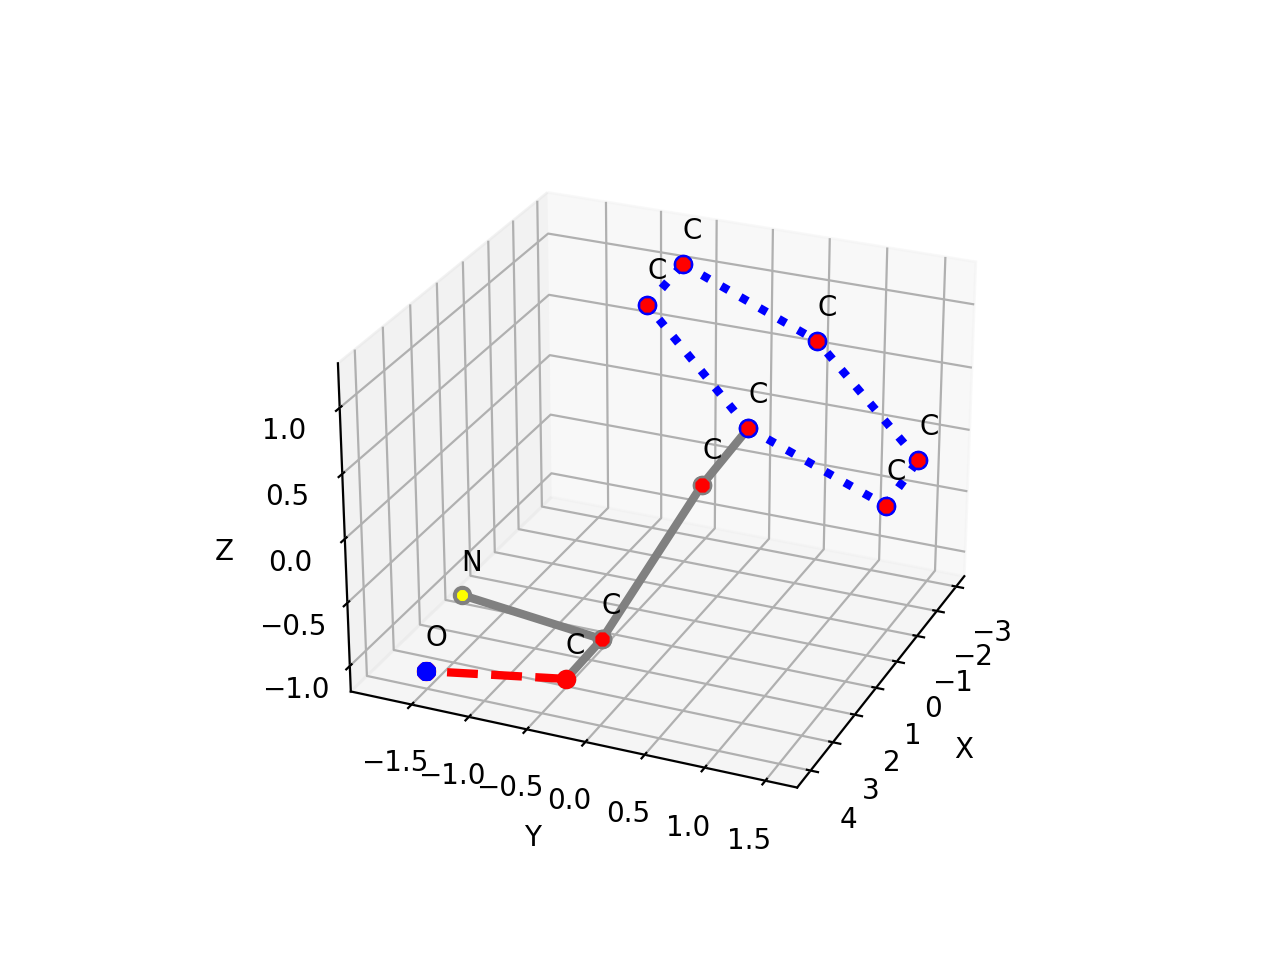

In [86]:
# 先绘制原子的散点图
%matplotlib notebook
import matplotlib.pyplot as plt
from numpy import *
import numpy as np
# Fixing random state for reproducibility

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for m in mol_xyz:
    if m[0] == 'N':
        ax.scatter(m[2][0], m[2][1], m[2][2], marker="8",c='yellow',s=10)
        ax.text(m[2][0], m[2][1],m[2][2]+0.2,'N',size=10)
        #ax.annotate([m[2][0], m[2][1],m[2][2]+0.3],'N',size=15)
    elif m[0] =='C':
        ax.scatter(m[2][0], m[2][1], m[2][2],  marker="8",c='red',s=20)
        ax.text(m[2][0], m[2][1],m[2][2]+0.2,'C',size=10)
    elif m[0] == 'O':
        ax.scatter(m[2][0], m[2][1], m[2][2],  marker="8",c='blue',s=40)
        ax.text(m[2][0], m[2][1],m[2][2]+0.2,'O',size=10)

# 再加一些原子的价键连接
for i in phe_mol.GetBonds():
    if str(i.GetBondType())== 'SINGLE':
        begin = list(phe_mol.GetConformer().GetAtomPosition(i.GetBeginAtomIdx()))
        end = list(phe_mol.GetConformer().GetAtomPosition(i.GetEndAtomIdx()))
        ax.plot([begin[0],end[0]],
                [begin[1],end[1]],
                [begin[2],end[2]],
                color='grey',
                marker='o',
                linestyle='-',
                linewidth=3)
    elif str(i.GetBondType())== 'DOUBLE':
        begin = list(phe_mol.GetConformer().GetAtomPosition(i.GetBeginAtomIdx()))
        end = list(phe_mol.GetConformer().GetAtomPosition(i.GetEndAtomIdx()))
        ax.plot([begin[0],end[0]],
                [begin[1],end[1]],
                [begin[2],end[2]],
                color='red',
                marker='o',
                linestyle='--',
                linewidth=3)
    elif str(i.GetBondType())== 'AROMATIC':
        begin = list(phe_mol.GetConformer().GetAtomPosition(i.GetBeginAtomIdx()))
        end = list(phe_mol.GetConformer().GetAtomPosition(i.GetEndAtomIdx()))
        ax.plot([begin[0],end[0]],
                [begin[1],end[1]],
                [begin[2],end[2]],
                color='blue',
                marker='o',
                linestyle=':',
                linewidth=3)
# 

# 加一些label相关标记
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#ax.plot()
plt.show()

### 当然后期也可以加一些自己的label以及理解